# Capstone 2 - Diabetes Patients’ Readmission Prediction

## Preprocessing and training

Code written by: Rayees Ahamed

**Steps:**

1. Feature engineering - new features from existing columns (e.g. column1 / column2)
2. Creating dummy features or indicator variables (get_dummies or OneHotEncoder)
3. Scaling the data and verifying it (mean/sd)
4. Correlation maps - (heatmaps, boxplots, scatterplots, pairplot, regplot etc.)
5. Split into train & test sets
6. Save data & summary

## Importing packages

In [218]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import os
from library.sb_utils import save_file

import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [219]:
Diabetes = pd.read_csv('data/Diabetes_EDA.csv')
Diabetes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20],1,1,7,3,?,...,No,Up,No,No,No,No,No,Yes,Yes,>30
1,64410,86047875,AfricanAmerican,Female,[20-30],1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40],1,1,7,2,?,...,No,Up,No,No,No,No,No,Yes,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50],1,1,7,1,?,...,No,Steady,No,No,No,No,No,Yes,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60],2,1,2,3,?,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [220]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78361 entries, 0 to 78360
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              78361 non-null  int64 
 1   patient_nbr               78361 non-null  int64 
 2   race                      78361 non-null  object
 3   gender                    78361 non-null  object
 4   age                       78361 non-null  object
 5   admission_type_id         78361 non-null  int64 
 6   discharge_disposition_id  78361 non-null  int64 
 7   admission_source_id       78361 non-null  int64 
 8   time_in_hospital          78361 non-null  int64 
 9   payer_code                78361 non-null  object
 10  medical_specialty         78361 non-null  object
 11  num_lab_procedures        78361 non-null  int64 
 12  num_procedures            78361 non-null  int64 
 13  num_medications           78361 non-null  int64 
 14  number_outpatient     

## Feature engineering

This is to generate new features from the existing ones to get more insights on the data. Below columns can be modified and feature engineered to get additional relationship between each column.

#### Age

In [221]:
Diabetes['age'].unique()

array(['[10-20]', '[20-30]', '[30-40]', '[40-50]', '[50-60]', '[60-70]',
       '[70-80]', '[80-90]', '[90-100]', '[0-10]'], dtype=object)

**Object to Numeric conversion:**
* Age column is grouped into different age categories and it is object dtype. 
* We can feature engineer their 'mean' age for each group that can be converted into numeric dtype.

In [222]:
# Creating a dataframe for age
df_age = Diabetes[['age']]

df_age.head()

,age
0,[10-20]
1,[20-30]
2,[30-40]
3,[40-50]
4,[50-60]


In [223]:
# Replacing the brackets '[]' with empty space
df_age['age'] = df_age['age'].str.replace('[', '')
df_age['age'] = df_age['age'].str.replace(']', '')

df_age.head()

,age
0,10-20
1,20-30
2,30-40
3,40-50
4,50-60


In [224]:
# Writing a function to split the age & calculate mean
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0]) + float(split_list[1])) / 2
    return mean

# Applying the function to get the mean age column
df_age['age_mean'] = df_age['age'].apply(lambda x: split_mean(x))

# Checking the new df
df_age.head()

,age,age_mean
0,10-20,15.0
1,20-30,25.0
2,30-40,35.0
3,40-50,45.0
4,50-60,55.0


In [225]:
# Append the new age column to the original dataframe
Diabetes['age_mean'] = df_age['age_mean']

# Checking the head in original df
Diabetes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_mean
0,149190,55629189,Caucasian,Female,[10-20],1,1,7,3,?,...,Up,No,No,No,No,No,Yes,Yes,>30,15.0
1,64410,86047875,AfricanAmerican,Female,[20-30],1,1,7,2,?,...,No,No,No,No,No,No,No,Yes,NO,25.0
2,500364,82442376,Caucasian,Male,[30-40],1,1,7,2,?,...,Up,No,No,No,No,No,Yes,Yes,NO,35.0
3,16680,42519267,Caucasian,Male,[40-50],1,1,7,1,?,...,Steady,No,No,No,No,No,Yes,Yes,NO,45.0
4,35754,82637451,Caucasian,Male,[50-60],2,1,2,3,?,...,Steady,No,No,No,No,No,No,Yes,>30,55.0


**Age_mean vs readmitted (target variable)**

Now we can check the newly created **age_mean** against target variable.

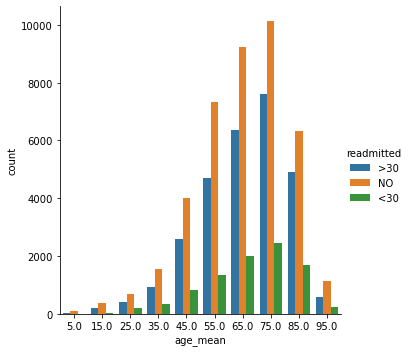

In [226]:
# Category plot to show the distribution of readmitted count
sns.catplot(x='age_mean', data=Diabetes, kind='count', hue='readmitted')
plt.show()

**Observation from Age_Mean vs Readmitted:**

* Age plays critical role in hospital readmission
* As diabetes people age, they high chance of getting readmitted

#### Time in hospital

In [227]:
# Checking the time_in_hospital column
Diabetes['time_in_hospital'].unique()

array([ 3,  2,  1,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14],
      dtype=int64)

#### Glucose levels (max_glu_serum)

In [228]:
# Checking glucose level indicators
Diabetes['max_glu_serum'].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

**Glycated hemoglobin levels (A1Cresult)**

In [229]:
# Checking A1C result levels
Diabetes['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

### Removing unneccessary columns

In [230]:
# Columns to drop
columns_to_drop =['race', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 
                 'diag_1', 'diag_2', 'diag_3', 'diabetesMed']

# Dropping unneccessary columns
Diabetes = Diabetes.drop(columns_to_drop, axis=1)

### Checking missing values once

In [231]:
Diabetes.isna().sum()

encounter_id                0
patient_nbr                 0
gender                      0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepirid

### Checking for duplicated rows

In [232]:
duplicate_df = Diabetes[Diabetes.duplicated()]
duplicate_df

,encounter_id,patient_nbr,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted,age_mean


### Categorical features dataframe

Creating dataframe containing only categorical variables.

In [233]:
df_object = Diabetes.select_dtypes(include='object')
df_object.nunique()

gender                      2
max_glu_serum               4
A1Cresult                   4
metformin                   4
repaglinide                 4
nateglinide                 4
chlorpropamide              4
glimepiride                 4
acetohexamide               2
glipizide                   4
glyburide                   4
tolbutamide                 2
pioglitazone                4
rosiglitazone               4
acarbose                    4
miglitol                    4
troglitazone                2
tolazamide                  3
examide                     1
citoglipton                 1
insulin                     4
glyburide-metformin         4
glipizide-metformin         2
glimepiride-pioglitazone    2
metformin-rosiglitazone     2
metformin-pioglitazone      2
change                      2
readmitted                  3
dtype: int64

### Correlation heatmap for numeric features

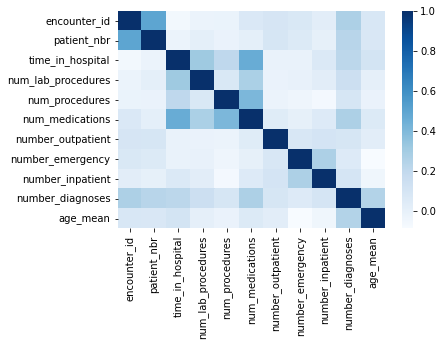

In [234]:
sns.heatmap(Diabetes.corr(), cmap='Blues')
plt.show()

**Observations from heatmap:**

* time_in_hospital & num_medications - positively correlated
* num_procedures & num_medications - positively correlated
* age_mean & num_emergency - negatively correlated

### Checking for outliers


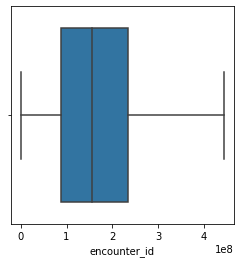

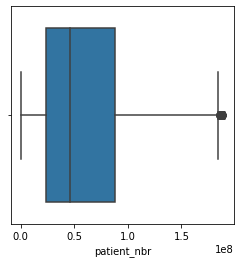

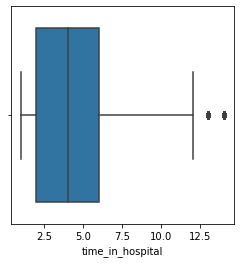

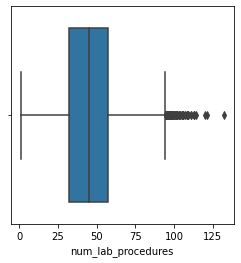

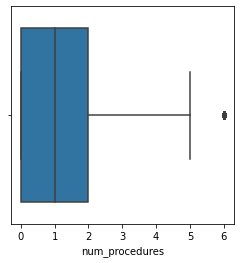

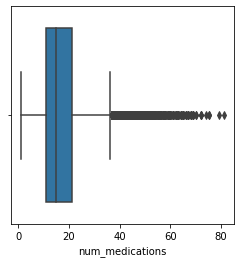

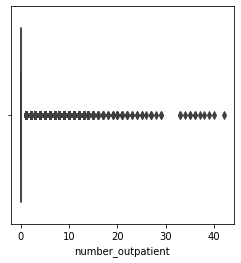

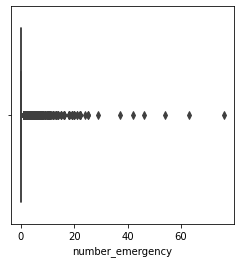

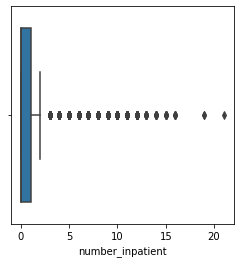

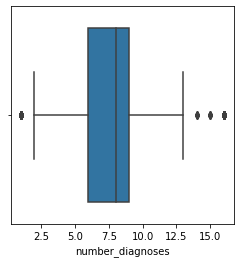

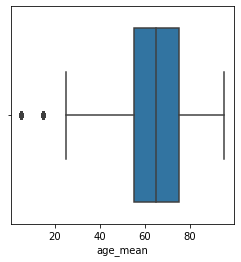

In [235]:
# Boxplot to check the outliers
df_num = Diabetes.select_dtypes(exclude='object')

for col in df_num.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df_num[col])
plt.show()

## Creating dummy features for categorical variables

In [236]:
# Dropping 'y' variable - redmitted & assigning the 'X'
X = Diabetes.drop('readmitted', axis=1)

In [237]:
# Getting dummies & assigning to X variable
X = pd.get_dummies(X)

# y variable
y = Diabetes['readmitted']

## Scaling the data

In [238]:
# Making a scaler object
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=list(X.columns))

In [239]:
scaled_df.head()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_No,change_Yes
0,-1.633211,0.024239,-0.498578,0.784045,-0.777225,0.139200,-0.292440,-0.217287,-0.510415,0.804660,...,0.012881,-0.012881,0.003572,-0.003572,0.005052,-0.005052,0.003572,-0.003572,-0.816662,0.816662
1,-1.634036,0.812587,-0.831412,-1.636453,2.137406,-0.467020,1.243633,-0.217287,0.270602,-0.747756,...,0.012881,-0.012881,0.003572,-0.003572,0.005052,-0.005052,0.003572,-0.003572,1.224497,-1.224497
2,-1.629797,0.719145,-0.831412,0.027639,-0.194299,-0.103288,-0.292440,-0.217287,-0.510415,-0.230284,...,0.012881,-0.012881,0.003572,-0.003572,0.005052,-0.005052,0.003572,-0.003572,-0.816662,0.816662
3,-1.634500,-0.315525,-1.164246,0.380629,-0.777225,-1.073240,-0.292440,-0.217287,-0.510415,-1.265227,...,0.012881,-0.012881,0.003572,-0.003572,0.005052,-0.005052,0.003572,-0.003572,-0.816662,0.816662
4,-1.634314,0.724201,-0.498578,-0.627912,2.720333,-0.103288,-0.292440,-0.217287,-0.510415,0.804660,...,0.012881,-0.012881,0.003572,-0.003572,0.005052,-0.005052,0.003572,-0.003572,1.224497,-1.224497


## Verifying the scaling

In [248]:
# Verifying the mean of scaled_df (mean =0)
scaled_df.mean()

encounter_id                     -3.571824e-16
patient_nbr                       3.272283e-16
time_in_hospital                  9.523631e-15
num_lab_procedures                6.059631e-16
num_procedures                   -1.040893e-14
                                      ...     
metformin-rosiglitazone_Steady    4.529068e-15
metformin-pioglitazone_No         5.352973e-15
metformin-pioglitazone_Steady    -2.650604e-15
change_No                         6.503556e-14
change_Yes                       -6.503556e-14
Length: 94, dtype: float64

In [249]:
# Verifying the standard deviation (std = 1)
scaled_df.std(ddof=0)

encounter_id                      1.0
patient_nbr                       1.0
time_in_hospital                  1.0
num_lab_procedures                1.0
num_procedures                    1.0
                                 ... 
metformin-rosiglitazone_Steady    1.0
metformin-pioglitazone_No         1.0
metformin-pioglitazone_Steady     1.0
change_No                         1.0
change_Yes                        1.0
Length: 94, dtype: float64

## Splitting the training and test data

In [253]:
# Train & test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

In [254]:
# Verifying X shape
X_train.shape, X_test.shape

((58770, 94), (19591, 94))

In [256]:
# Verifying y shape
y_train.shape, y_test.shape

((58770,), (19591,))

## Summary & next steps

* We feature engineered 'age' column from category to numeric by converting into age_mean.
* We observed aged people have high chance of getting readmitted
* We inspected the missing values, duplicated rows and outliers in the data
* Plotted the correlation heatmap for the numeric features - num_medications positively correlated with time_in_hospital, age_mean negatively correlated with num_emergency
* Followed by we scaled and verified the data
* Created the training and test sets from the original dataframe

**Next steps:**
* Choosing 2 to 3 type of different models to train the dataset.
* Analysing their performance metrics
* Selecting the best model and deploying it.

**Saving the data**

In [260]:
datapath = 'data/'

# Saving the processed dataframe
save_file(Diabetes, 'Diabetes_processed.csv', datapath)

# Saving the scaled_df
save_file(scaled_df, 'Diabetes_scaled.csv', datapath)

Writing file.  "data/Diabetes_processed.csv"
Writing file.  "data/Diabetes_scaled.csv"
